In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import shutil

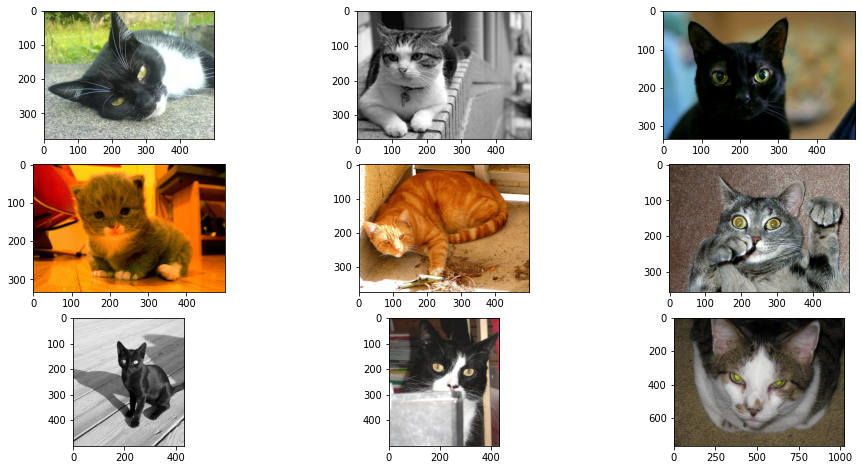

In [3]:
data_dir = "/kaggle/input/cat-dataset/CAT_00"

fig = plt.figure(figsize=(16,8))
i = 1

for file in os.listdir(data_dir):
    if i == 10:
        break
    if os.path.splitext(file)[-1] == ".jpg":
        fig.add_subplot(3,3,i)
        img = cv2.imread(os.path.join(data_dir,file))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        i+=1

plt.show()     
    

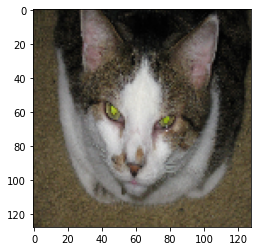

In [4]:
test_size = cv2.resize(img,(128,128))
plt.imshow(test_size)

In [6]:
if not os.path.exists("/kaggle/working/tmp"):
    os.mkdir("/kaggle/working/tmp")
    os.mkdir("/kaggle/working/tmp/imgs")
    

for path, dirs, files in os.walk("/kaggle/input/cat-dataset"):
    for name in files:
        if os.path.splitext(name)[-1].lower() == ".jpg":
            shutil.copy(os.path.join(path,name),os.path.join("/kaggle/working/tmp/imgs",name))


In [7]:
from keras.preprocessing.image import ImageDataGenerator

img_size = 256

train_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "/kaggle/working/tmp",
    target_size=(img_size,img_size),
    shuffle=True,
    class_mode="input",
    batch_size=64
)

Found 9993 images belonging to 1 classes.


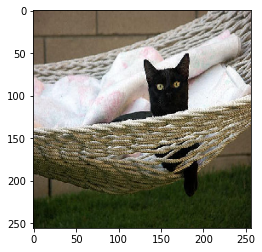

In [8]:
img,lab = next(train_data)

plt.imshow(img[0])

In [16]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

input_image = layers.Input(shape=(img_size,img_size,3))

#encoder
x = layers.Conv2D(16, (3, 3),strides=(2,2),activation='relu', padding='same')(input_image)#128
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3),strides=(2,2), activation='relu', padding='same')(x)#64
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3),strides=(2,2), activation='relu', padding='same')(x)#32
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3),strides=(2,2), activation='relu', padding='same')(x)#16
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, (3, 3),strides=(2,2), activation='relu', padding='same')(x)#8
x = layers.BatchNormalization()(x)
x = layers.Conv2D(512, (3, 3),strides=(2,2), activation='relu', padding='same')(x)#8
x = layers.BatchNormalization()(x)
 
#decoder
x = layers.Conv2DTranspose(512, (3, 3),strides=(2,2), activation='relu', padding='same')(x)#8
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(256, (3, 3), strides=2,activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(3, (3, 3), padding="same", activation="sigmoid")(x)

#autoencoder
autoencoder = Model(input_image, x)
autoencoder.compile(optimizer="Adam", loss="mean_absolute_error")
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256 

In [27]:
history = autoencoder.fit(train_data,epochs=30,verbose=2)

Epoch 1/30
157/157 - 120s - loss: 0.0609
Epoch 2/30
157/157 - 120s - loss: 0.0601
Epoch 3/30
157/157 - 120s - loss: 0.0590
Epoch 4/30
157/157 - 120s - loss: 0.0592
Epoch 5/30
157/157 - 119s - loss: 0.0581
Epoch 6/30
157/157 - 120s - loss: 0.0578
Epoch 7/30
157/157 - 120s - loss: 0.0566
Epoch 8/30
157/157 - 121s - loss: 0.0566
Epoch 9/30
157/157 - 119s - loss: 0.0561
Epoch 10/30
157/157 - 119s - loss: 0.0559
Epoch 11/30
157/157 - 119s - loss: 0.0557
Epoch 12/30
157/157 - 119s - loss: 0.0557
Epoch 13/30
157/157 - 119s - loss: 0.0554
Epoch 14/30
157/157 - 119s - loss: 0.0543
Epoch 15/30
157/157 - 120s - loss: 0.0542
Epoch 16/30
157/157 - 121s - loss: 0.0546
Epoch 17/30
157/157 - 121s - loss: 0.0541
Epoch 18/30
157/157 - 120s - loss: 0.0543
Epoch 19/30
157/157 - 120s - loss: 0.0542
Epoch 20/30
157/157 - 119s - loss: 0.0535
Epoch 21/30
157/157 - 120s - loss: 0.0540
Epoch 22/30
157/157 - 120s - loss: 0.0539
Epoch 23/30
157/157 - 120s - loss: 0.0531
Epoch 24/30
157/157 - 119s - loss: 0.0530
E

(256, 256, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

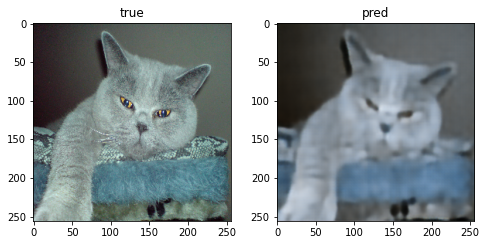

In [36]:
i, l = next(train_data)

f = plt.figure(figsize=(16,8))
f.add_subplot(2,1,1)
plt.imshow(i[0])
plt.title("true")

print(i[0].shape)
im = np.reshape(i[0],(1,img_size,img_size,3))


pred = autoencoder.predict(np.reshape(i[0],(1,img_size,img_size,3)))
f.add_subplot(2,2,2)
plt.imshow(np.reshape(pred,(img_size,img_size,3)))
plt.title("pred")
plt.show